# Stock Price Forecasting Using Historical Data and Financial Indicators

## 1. Project Overview

## Introduction
This project aims to forecast future stock prices using historical data and various machine learning techniques. The process involves data preprocessing, feature engineering, model building, and evaluation.

## Data Preprocessing
The dataset includes historical stock prices with columns for Date, Open, High, Low, Close, and Volume. The Date column was converted to datetime format, and various date-based features were created.

## Exploratory Data Analysis (EDA)
EDA techniques such as line charts, candlestick charts, and correlation analysis were used to understand the data's underlying structure and relationships.

## Feature Engineering
Features such as lagged prices, technical indicators, and date-based features were engineered to improve the model's predictive performance.

## Model Building and Evaluation
A RandomForestRegressor was used to predict future stock prices. The model was fine-tuned using GridSearchCV, and its performance was evaluated using metrics like MSE, MAE, and R-Squared.

## Forecasting
The model was used to predict future stock prices for the next 30 business days. Walk-forward validation was performed to simulate real-time prediction scenarios.


### Understanding the Data
The dataset includes the following columns:

- **Date**: Date of the stock data
- **Open**: Opening price
- **High**: Highest price of the day
- **Low**: Lowest price of the day
- **Close**: Closing price
- **Adj Close**: Adjusted closing price (accounting for corporate actions)
- **Volume**: Number of shares traded


The dataset spans 1258 days, from September 3, 2019, to August 30, 2024.

data source: https://finance.yahoo.com/quote/NDAQ/history/?guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAALB1rZy_4joT3mpo_wfv9r9Vd7iSZNLta4NzV0kttnLWT1eDGj7bGAF8EhCU1EAqQ2GAv5TmEocemroSqvY4ajSEp8hC1rNJs9v43gBU-jLP_SYXRiTkppugoPMYOh1foQDMBABm8hTBG1SvgLyf8k3S7r4oJfvUlIWx2Kyj81GL&guccounter=2&period1=1567241948&period2=1724976000 

## 2. Imports

In [1]:
import pandas as pd


## 3. Data Loading

In [2]:
stock = pd.read_csv('./datasets/NDAQ.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-03,33.279999,33.366669,33.006668,33.176666,30.771736,1091700
1,2019-09-04,33.340000,33.389999,33.049999,33.303333,30.889227,1215000
2,2019-09-05,33.570000,34.036667,33.413334,34.006668,31.541580,1826700
3,2019-09-06,34.116669,34.813332,34.049999,34.753334,32.234119,2254800
4,2019-09-09,34.930000,35.086666,34.223331,34.279999,31.795088,1612200


## 4. Data Inspection

In [3]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [4]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,52.404936,52.912419,51.883940,52.410776,50.740858,2.570756e+06
std,10.366754,10.406595,10.317112,10.363064,10.627781,1.448224e+06
min,25.636667,26.856667,23.886667,24.286667,22.845490,5.754000e+05
25%,43.530833,43.965834,43.160833,43.512499,41.164408,1.776575e+06
50%,54.404999,54.935000,54.024999,54.511665,53.011950,2.231550e+06
75%,60.182499,60.690000,59.665001,60.187499,59.108357,2.916525e+06
max,71.519997,72.139999,71.139999,72.080002,72.080002,1.827430e+07


**Observations**:

- No missng values
- All parameters have simiar ranges except the volume. Scaling is required

## 5. Exploratory Data Analysis

### Line Charts

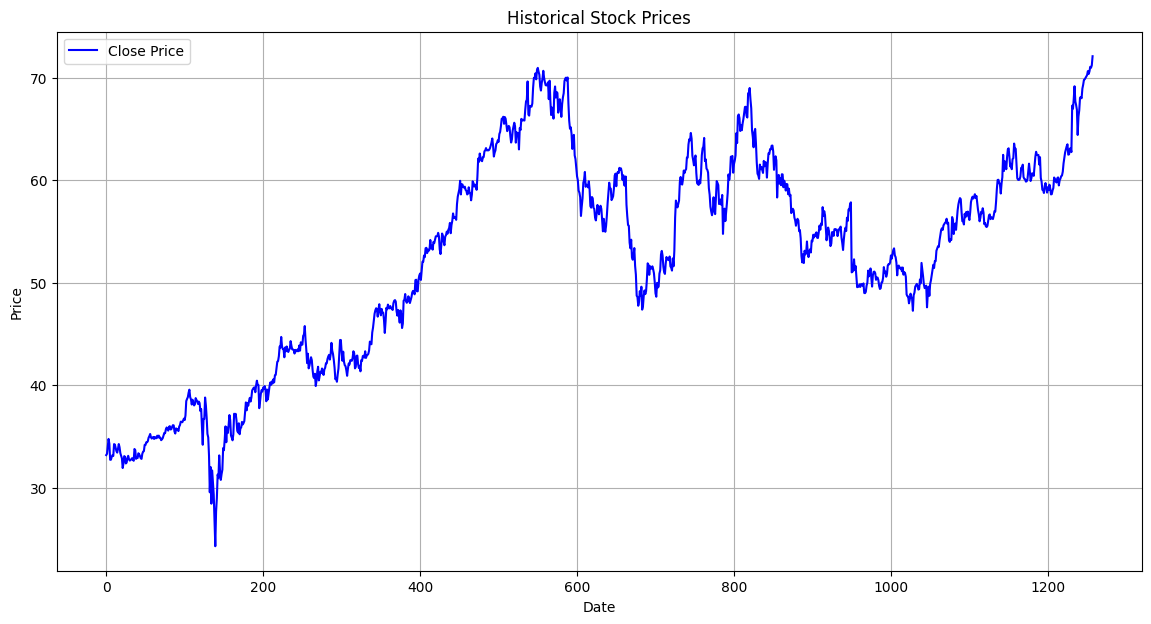

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(stock.index, stock['Close'], label='Close Price', color='blue')
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### Candlestick charts

In [6]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=stock.index,
                                     open=stock['Open'],
                                     high=stock['High'],
                                     low=stock['Low'],
                                     close=stock['Close'])])
fig.update_layout(title='Candlestick Chart of Stock Prices',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()

### Scatter plots

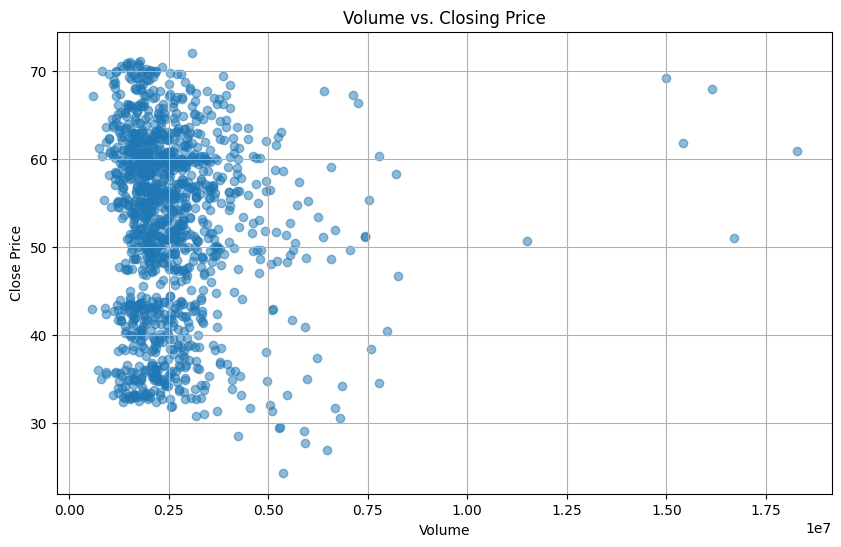

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(stock['Volume'], stock['Close'], alpha=0.5)
plt.title('Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

### Summary statistics

In [8]:
stock[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].describe()


,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,52.404936,52.912419,51.883940,52.410776,50.740858,2.570756e+06
std,10.366754,10.406595,10.317112,10.363064,10.627781,1.448224e+06
min,25.636667,26.856667,23.886667,24.286667,22.845490,5.754000e+05
25%,43.530833,43.965834,43.160833,43.512499,41.164408,1.776575e+06
50%,54.404999,54.935000,54.024999,54.511665,53.011950,2.231550e+06
75%,60.182499,60.690000,59.665001,60.187499,59.108357,2.916525e+06
max,71.519997,72.139999,71.139999,72.080002,72.080002,1.827430e+07


### Skewness

In [9]:
from scipy.stats import skew

skewness = skew(stock['Close'])
print(f'Skewness of Closing Prices: {skewness}')


Skewness of Closing Prices: -0.3870183235627512


### Simple Moving Average (SMA)

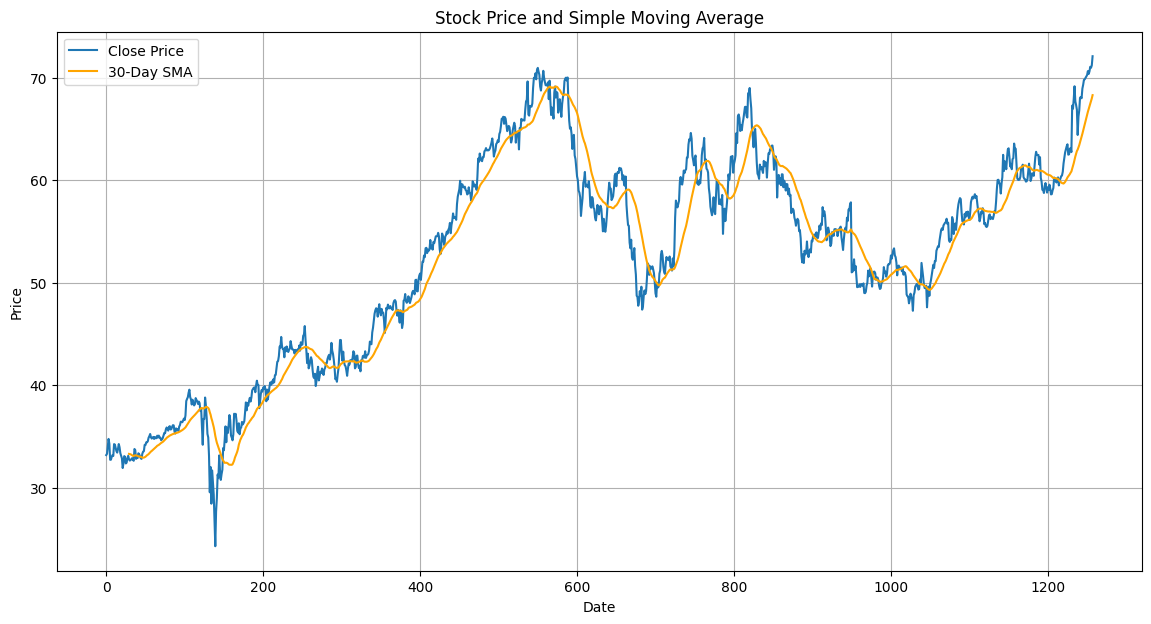

In [10]:
stock['SMA_30'] = stock['Close'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(stock['Close'], label='Close Price')
plt.plot(stock['SMA_30'], label='30-Day SMA', color='orange')
plt.title('Stock Price and Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


### Exponential Moving Average (EMA)

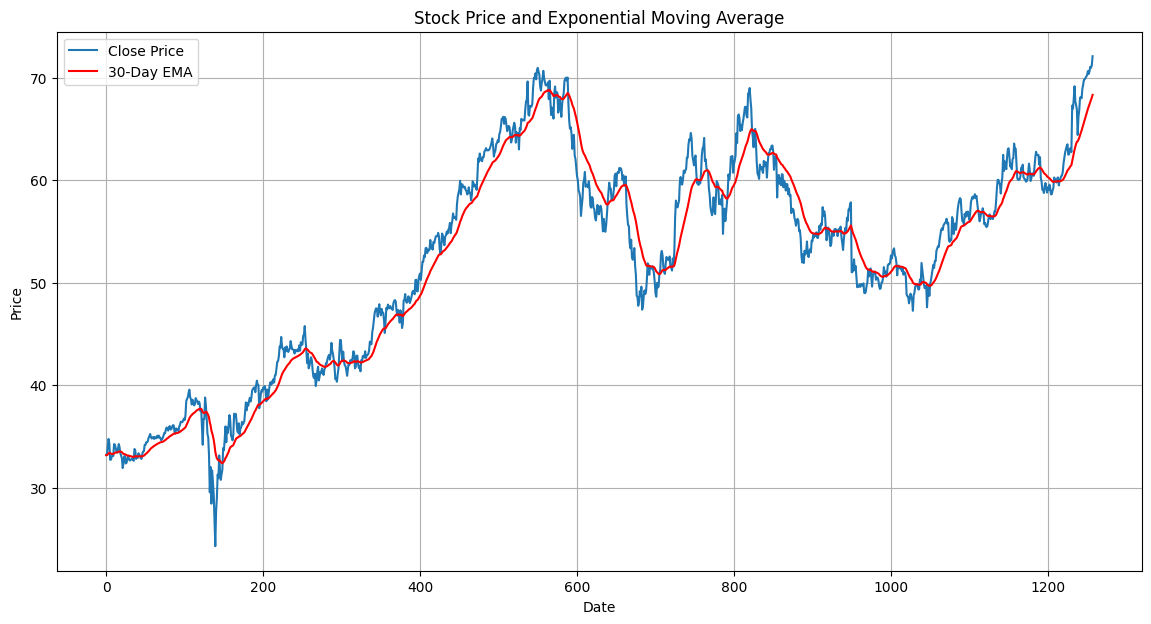

In [11]:
stock['EMA_30'] = stock['Close'].ewm(span=30, adjust=False).mean()

plt.figure(figsize=(14, 7))
plt.plot(stock['Close'], label='Close Price')
plt.plot(stock['EMA_30'], label='30-Day EMA', color='red')
plt.title('Stock Price and Exponential Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


### Daily Returns

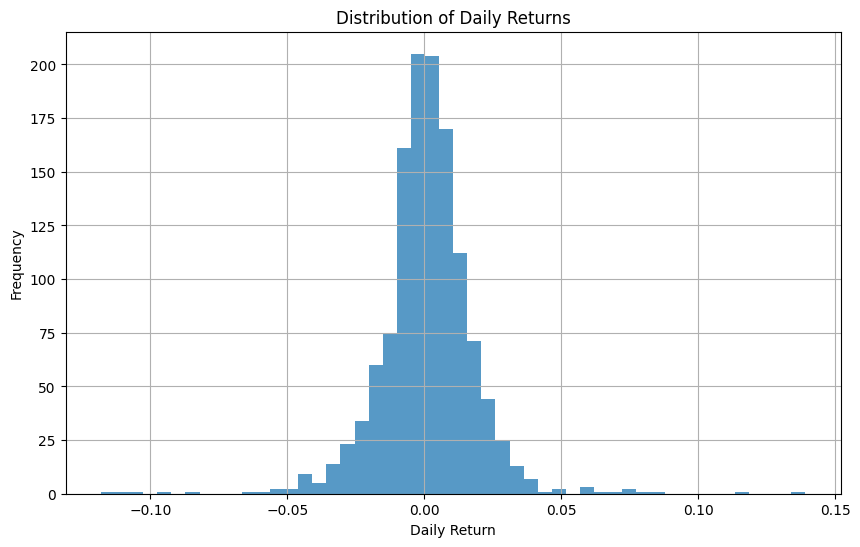

In [12]:
stock['Daily_Return'] = stock['Close'].pct_change()

plt.figure(figsize=(10, 6))
plt.hist(stock['Daily_Return'].dropna(), bins=50, alpha=0.75)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Correlation between Stocks or Indicators

In [13]:
correlation = stock[['Close', 'Volume']].corr()
print('Correlation Matrix:')
print(correlation)


Correlation Matrix:
           Close    Volume
Close   1.000000 -0.047181
Volume -0.047181  1.000000


### Outlier Detection

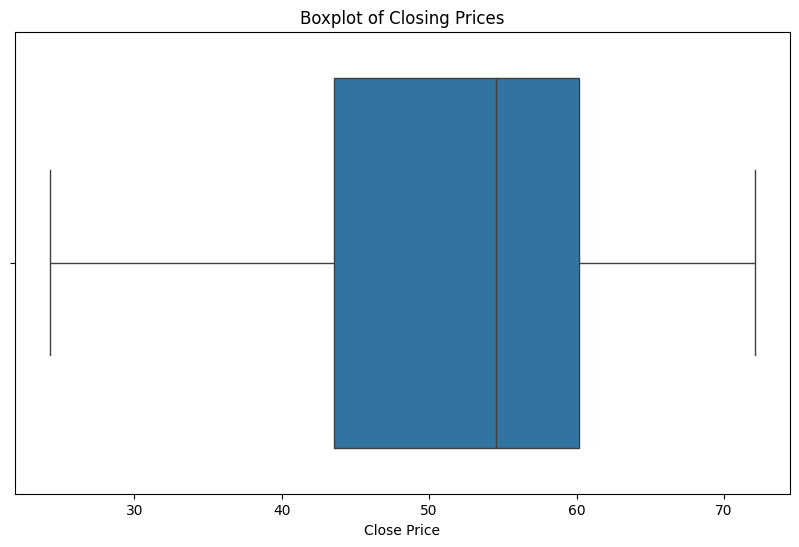

In [14]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=stock['Close'])
plt.title('Boxplot of Closing Prices')
plt.xlabel('Close Price')
plt.show()


### Time Series Decomposition

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(stock['Close'], model='additive')
decomposition.plot()
plt.show()


ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

### Lag feature Creation

In [16]:
stock['Lag_1'] = stock['Close'].shift(1)
stock['Lag_2'] = stock['Close'].shift(2)
stock = stock.dropna()


### Relative Strength INdex (RSA)

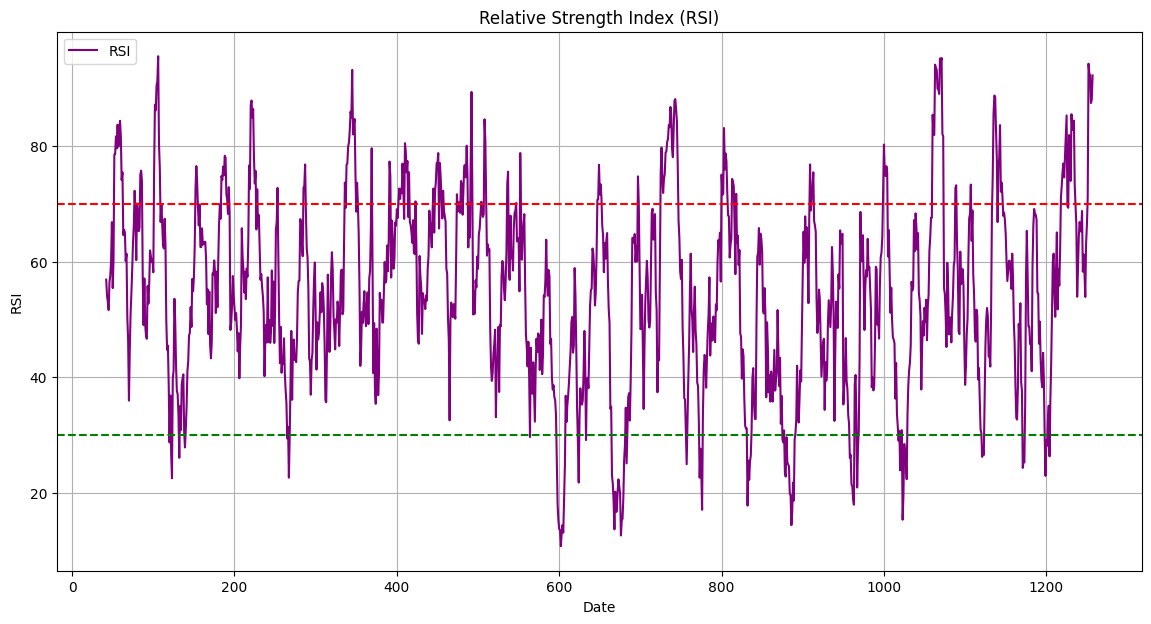

In [17]:
def calculate_rsi(data, period=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

stock['RSI'] = calculate_rsi(stock['Close'])

plt.figure(figsize=(14, 7))
plt.plot(stock['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()


### Bollinger Bands

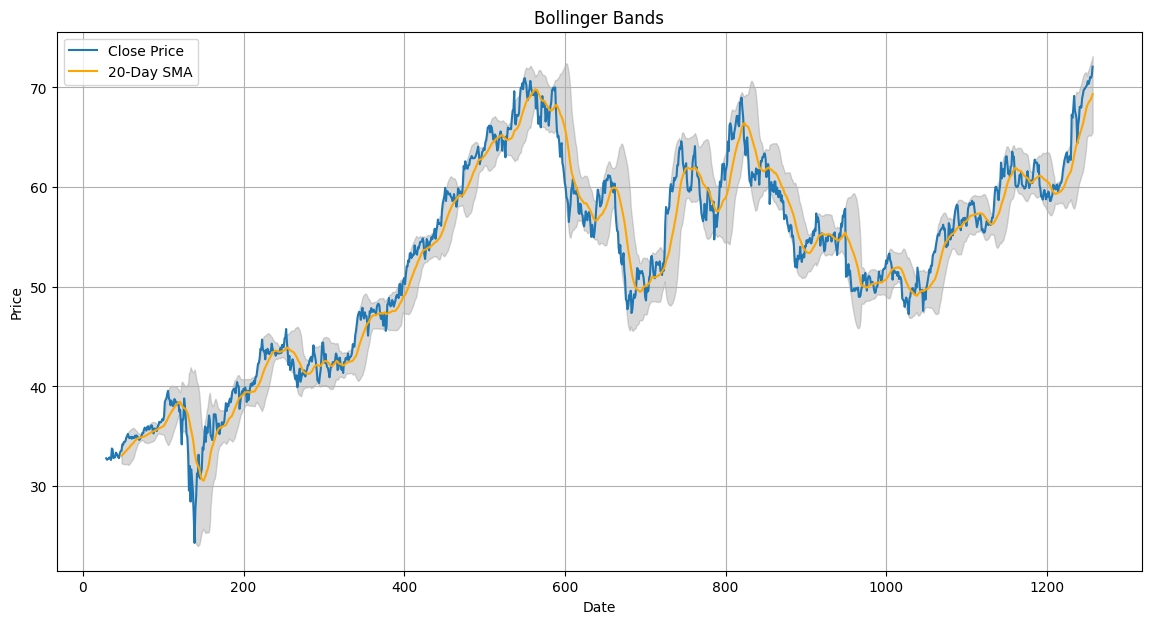

In [18]:
stock['SMA_20'] = stock['Close'].rolling(window=20).mean()
stock['Bollinger_Upper'] = stock['SMA_20'] + (stock['Close'].rolling(window=20).std() * 2)
stock['Bollinger_Lower'] = stock['SMA_20'] - (stock['Close'].rolling(window=20).std() * 2)

plt.figure(figsize=(14, 7))
plt.plot(stock['Close'], label='Close Price')
plt.plot(stock['SMA_20'], label='20-Day SMA', color='orange')
plt.fill_between(stock.index, stock['Bollinger_Lower'], stock['Bollinger_Upper'], color='gray', alpha=0.3)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


### MACD (Moving Average Convergence Divergence)

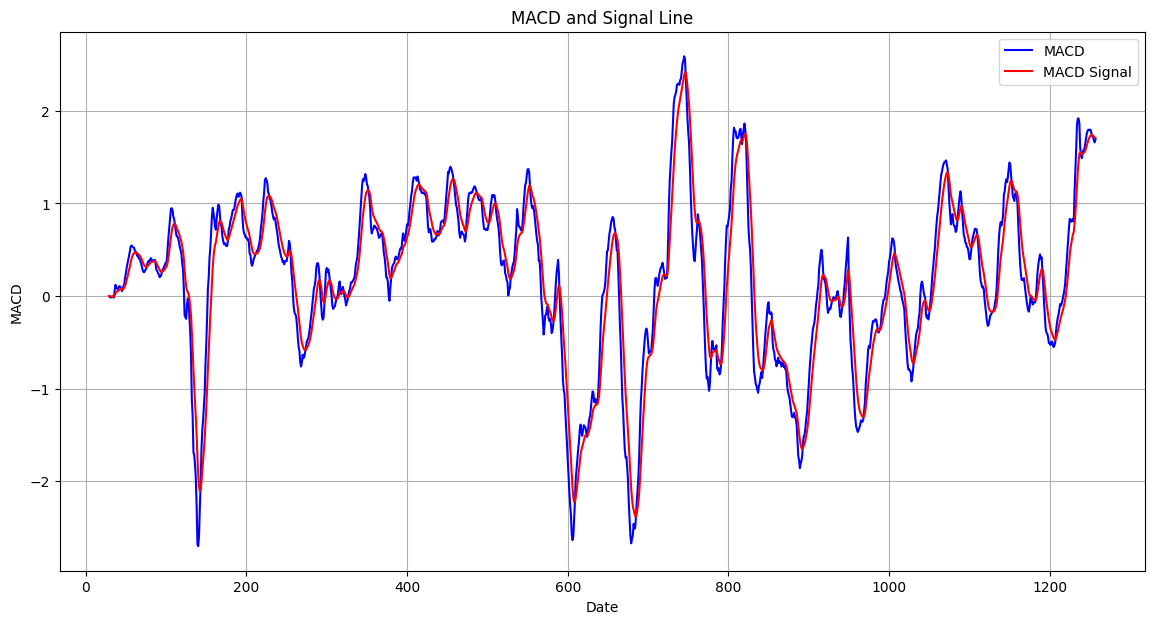

In [19]:
stock['EMA_12'] = stock['Close'].ewm(span=12, adjust=False).mean()
stock['EMA_26'] = stock['Close'].ewm(span=26, adjust=False).mean()
stock['MACD'] = stock['EMA_12'] - stock['EMA_26']
stock['MACD_Signal'] = stock['MACD'].ewm(span=9, adjust=False).mean()

plt.figure(figsize=(14, 7))
plt.plot(stock['MACD'], label='MACD', color='blue')
plt.plot(stock['MACD_Signal'], label='MACD Signal', color='red')
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()


### Risk Analysis

In [20]:
import numpy as np

# Calculate daily returns
stock['Daily_Return'] = stock['Close'].pct_change().dropna()

# Calculate VaR at 95% confidence level
VaR_95 = np.percentile(stock['Daily_Return'].dropna(), 5)
print(f'Value at Risk (95% confidence level): {VaR_95}')


Value at Risk (95% confidence level): -0.025260214668737492


## 6. Data Preprocessing

In [21]:
# Convert the Date Column to datetime format
stock['Date'] = pd.to_datetime(stock['Date'])
stock.set_index('Date', inplace=True)


To enhance the model with features derived from the date...

In [22]:
# Create date based columnss
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day
stock['DayOfWeek'] = stock.index.dayofweek
stock['IsMonthStart'] = stock.index.is_month_start
stock['IsMonthEnd'] = stock.index.is_month_end


...and capture the effect of previous days' stock prices on the current price.

In [23]:
# Create lagged features
stock['Lag_1'] = stock['Close'].shift(1)
stock['Lag_2'] = stock['Close'].shift(2)
stock['Lag_5'] = stock['Close'].shift(5)
stock['Lag_10'] = stock['Close'].shift(10)
stock.dropna(inplace=True)

...then prepare for model building.

In [24]:
from sklearn.model_selection import train_test_split

features = stock.drop(['Close'], axis=1)
target = stock['Close']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=False)

## 7. Model Building

### Train Regression model

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### Model Evaluation

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-Squared: {r2}')


Mean Squared Error: 0.6839578660634817
Mean Absolute Error: 0.7123175142148735
R-Squared: 0.9778358448812579


## 8. Model Interpretation and Fine-Tuning

### Feature Importance

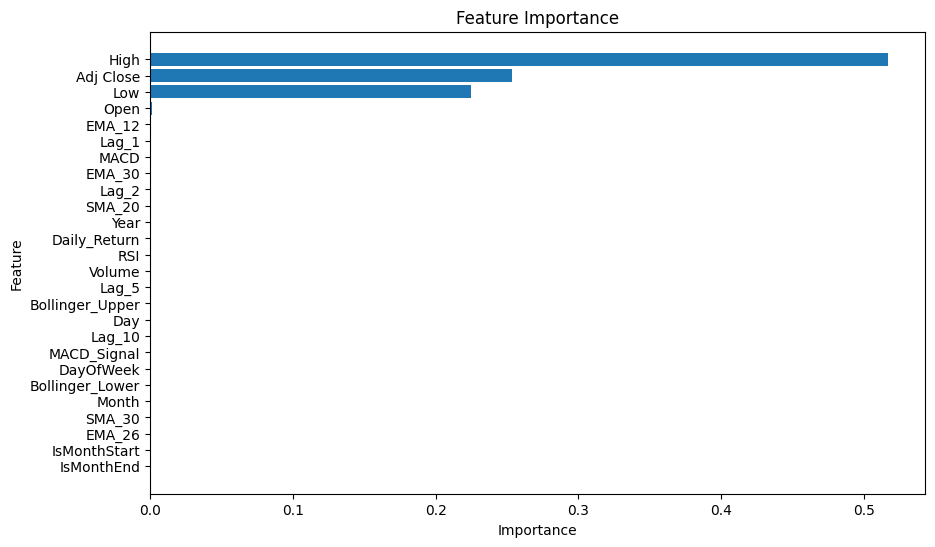

In [29]:
importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


### Hyperparameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f'Best Parameters: {grid_search.best_params_}')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}


### Evaluation

In [31]:
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f'Tuned Mean Squared Error: {mse_tuned}')
print(f'Tuned Mean Absolute Error: {mae_tuned}')
print(f'Tuned R-Squared: {r2_tuned}')


Tuned Mean Squared Error: 0.6593146169802091
Tuned Mean Absolute Error: 0.7001500793654098
Tuned R-Squared: 0.9786344273998786


## 9. Model Validation and Backtesting

In [32]:
# Validate the model using walk-forward validation to simulate
# a real-time prediction scenario.
def walk_forward_validation(data, n_test):
    predictions = []
    for i in range(len(data) - n_test):
        train, test = data[0:i + n_test], data[i + n_test:i + n_test + 1]
        model.fit(train.drop(['Close'], axis=1), train['Close'])
        yhat = model.predict(test.drop(['Close'], axis=1))
        predictions.append(yhat[0])
    return predictions

predictions = walk_forward_validation(stock, len(X_test))

# Calculate metrics for walk-forward validation
mse_wfv = mean_squared_error(y_test[:len(predictions)], predictions)
mae_wfv = mean_absolute_error(y_test[:len(predictions)], predictions)
r2_wfv = r2_score(y_test[:len(predictions)], predictions)

print(f'Walk-Forward Validation MSE: {mse_wfv}')
print(f'Walk-Forward Validation MAE: {mae_wfv}')
print(f'Walk-Forward Validation R-Squared: {r2_wfv}')


ValueError: Found input variables with inconsistent numbers of samples: [242, 968]

In [33]:
# Forecast stock prices for future dates using the trained model.
future_dates = pd.date_range(start=stock.index[-1], periods=30, freq='B')
future_df = pd.DataFrame(index=future_dates)
future_df['Year'] = future_df.index.year
future_df['Month'] = future_df.index.month
future_df['Day'] = future_df.index.day
future_df['DayOfWeek'] = future_df.index.dayofweek
future_df['IsMonthStart'] = future_df.index.is_month_start
future_df['IsMonthEnd'] = future_df.index.is_month_end
future_df['Lag_1'] = stock['Close'].shift(1).iloc[-1]
future_df['Lag_2'] = stock['Close'].shift(2).iloc[-1]

# Add RSI, Bollinger Bands, and MACD for future dates if necessary
# Assuming you have functions to calculate these indicators for future data

future_prices = best_model.predict(future_df)
future_df['Predicted_Close'] = future_prices

plt.figure(figsize=(14, 7))
plt.plot(stock['Close'], label='Historical Close Price')
plt.plot(future_df['Predicted_Close'], label='Predicted Close Price', color='orange')
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Adj Close
- Bollinger_Lower
- Bollinger_Upper
- Daily_Return
- EMA_12
- ...
